In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
dataset= pd.read_csv('BostonHousing.csv')

In [4]:
dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
y= dataset['medv']

In [7]:
X= dataset.drop(['medv'], axis=1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=56)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [11]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [14]:
ridge_regressor= Ridge()
ridge_regressor

Ridge()

In [16]:
parameters= {'alpha': [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}

ridgeCV= GridSearchCV(ridge_regressor, parameters, scoring= 'neg_mean_squared_error', cv=5)

ridgeCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [17]:
print(ridgeCV.best_params_)

{'alpha': 8}


In [18]:
print(ridgeCV.best_score_)

-23.282547933752497


In [20]:
ridge_pred= ridgeCV.predict(X_test)

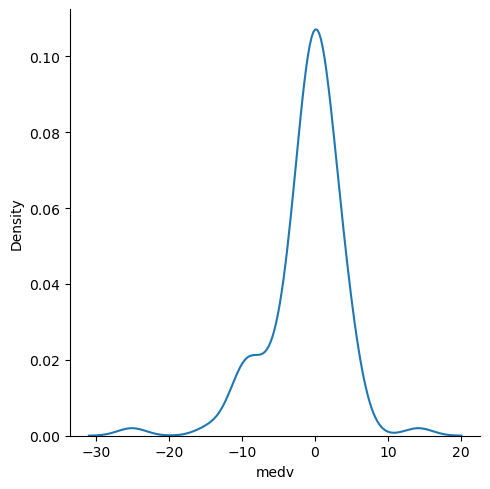

In [22]:
sns.displot(ridge_pred-y_test, kind='kde')

In [23]:
from sklearn.metrics import r2_score

score= r2_score(ridge_pred, y_test)

In [24]:
score

0.6198052376514596